In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Veri okuma gerçekleştirildi.
data = pd.read_csv('spotify_songs.csv')

# İlk 5 satırı görüntülendi.
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
# Veri setindeki sütun adlarını yeniden adlandırma işlemi yapıldı.
data.rename(columns={'track_popularity': 'popularity', 
                     'track_artist': 'artist', 
                     'track_name': 'name', 
                     'track_album_id': 'album_id', 
                     'track_album_name': 'album_name', 
                     'track_album_release_date': 'album_release_date', 
                     'playlist_genre': 'genre', 
                     'playlist_subgenre': 'subgenre'}, inplace=True)

In [5]:
print("Columns: ", data.columns) # Sütun adlarını görüntüleme
print("Shape: ", data.shape) # Veri setinin boyutunu görüntüleme
print("Info: ", data.info()) # Veri setinin genel bilgilerini görüntüleme
print("Unique Playlist Name Number: ", len(data['playlist_name'].unique())) # Eşsiz çalma listesi isimlerinin sayısını görüntüleme
print("Description: ", data.describe().T) # Veri setinin istatistiksel özetini görüntüleme

Columns:  Index(['track_id', 'name', 'artist', 'popularity', 'album_id', 'album_name',
       'album_release_date', 'playlist_name', 'playlist_id', 'genre',
       'subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')
Shape:  (32833, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            32833 non-null  object 
 1   name                32828 non-null  object 
 2   artist              32828 non-null  object 
 3   popularity          32833 non-null  int64  
 4   album_id            32833 non-null  object 
 5   album_name          32828 non-null  object 
 6   album_release_date  32833 non-null  object 
 7   playlist_name       32833 non-null  object 
 8   playlist_id 

In [ ]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(data, title="Spotify Data Report", explorative=True)
# profile.to_notebook_iframe()
# profile.to_file("spotify_eda_report.html")

In [6]:
# Numerik sütunlar listesi çıkarıldı.
numeric_cols = ['popularity', 'danceability', 'energy', 'key','valence', 'tempo', 'loudness',
                'acousticness', 'instrumentalness', 'speechiness', 'liveness', 'duration_ms']

In [7]:
# Null içeren sütunlar listelendi.
cols_including_null = data.columns[data.isnull().sum() != 0]
cols_including_null

Index(['name', 'artist', 'album_name'], dtype='object')

In [8]:
# Null içeren satırlar listelendi. Toplamda 5 satır null değer içeriyor.
rows_with_null = data[data.isnull().any(axis=1)]
rows_with_null

,track_id,name,artist,popularity,album_id,album_name,album_release_date,playlist_name,playlist_id,genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


In [9]:
data.fillna("Unknown", inplace=True)

In [10]:
rows_with_null = data[data.isnull().any(axis=1)]
rows_with_null

,track_id,name,artist,popularity,album_id,album_name,album_release_date,playlist_name,playlist_id,genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms


In [11]:
data[data['track_id'].duplicated()]

,track_id,name,artist,popularity,album_id,album_name,album_release_date,playlist_name,playlist_id,genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
1299,1HfMVBKM75vxSfsQ5VefZ5,Lose You To Love Me,Selena Gomez,93,3tBkjgxDqAwss76O1YHsSY,Lose You To Love Me,2019-10-23,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,4,-9.005,1,0.0438,0.576000,0.00000,0.2100,0.0916,101.993,206459
1300,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,98,3nR9B40hYLKLcR0Eph3Goc,Memories,2019-09-20,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,11,-7.209,1,0.0546,0.837000,0.00000,0.0822,0.5750,91.019,189486
1304,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,94,5658aM19fA3JVwTK6eQX70,Divinely Uninspired To A Hellish Extent,2019-05-17,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,1,-5.679,1,0.0319,0.751000,0.00000,0.1050,0.4460,109.891,182161
1305,6v3KW9xbzN5yKLt9YKDYA2,Señorita,Shawn Mendes,88,0xzScN8P3hQAz3BT3YYX5w,Shawn Mendes (Deluxe),2019-06-19,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,9,-6.049,0,0.0290,0.039200,0.00000,0.0828,0.7490,116.967,190800
1307,6cy3ki60hLwimwIje7tALf,RITMO (Bad Boys For Life),The Black Eyed Peas,96,6EobpC5SDFy5DF50dWNVGF,RITMO (Bad Boys For Life),2019-10-12,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,10,-7.037,0,0.0657,0.033400,0.00084,0.2370,0.6670,104.994,221714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32783,1mzGywacjpeik00PVLBPpF,All of Me (Tiësto's Birthday Treatment Remix) ...,John Legend,64,4c2rSdHI9WUXn0zyXoWtbB,All of Me (Tiësto's Birthday Treatment Remix) ...,2014-02-25,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-6.253,0,0.0283,0.000151,0.00165,0.0745,0.1790,127.986,251613
32793,1nas007nDbzLwDGwvMdz79,How You Love Me,3LAU,52,0IsgaoqRfJAJ6wojxWDZ7C,How You Love Me,2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,1,-3.648,1,0.0839,0.183000,0.00000,0.3400,0.2860,127.961,210469
32798,65hRZOQkVjmBdusz1N7aOv,Save The World,Swedish House Mafia,67,728voOLBbJUBgK2vooghcS,Save The World,2011-05-13,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-7.598,1,0.0474,0.014400,0.00000,0.0759,0.4000,126.879,213338
32804,2KlZexJjJPuNWcN5uAG1GU,Gold (feat. Yuna),Adventure Club,1,2DVyzKYzqlQo4uTJLVtvBt,Calling All Heroes - EP,2013-10-22,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,9,-4.893,0,0.0413,0.031900,0.00536,0.1280,0.1890,145.022,257045


In [12]:
data[data['track_id'] == '6v3KW9xbzN5yKLt9YKDYA2']

,track_id,name,artist,popularity,album_id,album_name,album_release_date,playlist_name,playlist_id,genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
1167,6v3KW9xbzN5yKLt9YKDYA2,Señorita,Shawn Mendes,88,0xzScN8P3hQAz3BT3YYX5w,Shawn Mendes (Deluxe),2019-06-19,TUNES DANCE AND POP,3arpkhoRWXEYbdCpVAIrRR,pop,...,9,-6.049,0,0.029,0.0392,0.0,0.0828,0.749,116.967,190800
1305,6v3KW9xbzN5yKLt9YKDYA2,Señorita,Shawn Mendes,88,0xzScN8P3hQAz3BT3YYX5w,Shawn Mendes (Deluxe),2019-06-19,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,9,-6.049,0,0.029,0.0392,0.0,0.0828,0.749,116.967,190800
18651,6v3KW9xbzN5yKLt9YKDYA2,Señorita,Shawn Mendes,88,0xzScN8P3hQAz3BT3YYX5w,Shawn Mendes (Deluxe),2019-06-19,Latin Pop 2019,5wONX0lVyQE5XTxqjTUiUd,latin,...,9,-6.049,0,0.029,0.0392,0.0,0.0828,0.749,116.967,190800
20329,6v3KW9xbzN5yKLt9YKDYA2,Señorita,Shawn Mendes,88,0xzScN8P3hQAz3BT3YYX5w,Shawn Mendes (Deluxe),2019-06-19,Latest Latin American Hits 2020,51LvliKED7oZNJR8XCiPip,latin,...,9,-6.049,0,0.029,0.0392,0.0,0.0828,0.749,116.967,190800
23114,6v3KW9xbzN5yKLt9YKDYA2,Señorita,Shawn Mendes,88,0xzScN8P3hQAz3BT3YYX5w,Shawn Mendes (Deluxe),2019-06-19,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,9,-6.049,0,0.029,0.0392,0.0,0.0828,0.749,116.967,190800
30216,6v3KW9xbzN5yKLt9YKDYA2,Señorita,Shawn Mendes,88,0xzScN8P3hQAz3BT3YYX5w,Shawn Mendes (Deluxe),2019-06-19,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,9,-6.049,0,0.029,0.0392,0.0,0.0828,0.749,116.967,190800


In [13]:

def encode_playlist_info(df):
    """
    Spotify veri setinde playlist bilgilerini anlamlı sayısal temsillere dönüştürür.
    - playlist_genre ve playlist_subgenre sütunlarını one-hot encode eder.
    - Her şarkının yer aldığı playlist sayısını (playlist_count) hesaplar.
    - Gereksiz playlist sütunlarını kaldırır.

    Parametre:
        df (pd.DataFrame): Orijinal Spotify veri seti.

    Dönüş:
        merged_df (pd.DataFrame): Yeni özellikler eklenmiş, playlist sütunları işlenmiş DataFrame.
    """

    df = df.copy()

    # --- 1️⃣ Playlist count: bir şarkı kaç farklı playlist'te var ---
    playlist_count = df.groupby('track_id')['playlist_id'].nunique()
    df['playlist_count'] = df['track_id'].map(playlist_count)

    # --- 2️⃣ Genre encoding: one-hot (multi-label) ---
    genre_dummies = pd.get_dummies(df['genre'], prefix='genre', dtype=int)
    subgenre_dummies = pd.get_dummies(df['subgenre'], prefix='subgenre', dtype=int)

    # Şarkı bazında grupla (aynı şarkı birden fazla genre’de olabilir)
    genre_features = (
        pd.concat([df[['track_id']], genre_dummies, subgenre_dummies], axis=1)
        .groupby('track_id', as_index=False)
        .max()
    )

    # --- 3️⃣ Şarkı bazında unique satır oluştur ---
    base_cols = [
        'track_id', 'name', 'artist', 'album_id', 'album_name',
        'popularity', 'album_release_date',
        'danceability', 'energy', 'key', 'loudness', 'mode',
        'speechiness', 'acousticness', 'instrumentalness',
        'liveness', 'valence', 'tempo', 'duration_ms'
    ]
    base_df = df.drop_duplicates(subset=['track_id'])[base_cols + ['playlist_count']]

    # --- 4️⃣ Merge işlemi ---
    merged_df = base_df.merge(genre_features, on='track_id', how='left')

    # --- 5️⃣ Gereksiz sütunları kaldır ---
    drop_cols = ['playlist_name', 'playlist_id', 'genre', 'subgenre']
    merged_df = merged_df.drop(columns=[c for c in drop_cols if c in merged_df.columns], errors='ignore')

    print(f"✅ encode_playlist_info tamamlandı → Yeni shape: {merged_df.shape}")
    print(f"ℹ️ Genre sütunu sayısı: {len([c for c in merged_df.columns if c.startswith('genre_')])}")
    print(f"ℹ️ Subgenre sütunu sayısı: {len([c for c in merged_df.columns if c.startswith('subgenre_')])}")

    return merged_df

# Spotify veri setini işleme
encoded_data = encode_playlist_info(data)

# Yeni sütunları görmek için:
encoded_data.filter(regex='^(genre_|subgenre_)').head()
encoded_data[encoded_data['track_id'] == '6v3KW9xbzN5yKLt9YKDYA2'].transpose()

data = encoded_data
data[data['track_id'] == '6v3KW9xbzN5yKLt9YKDYA2'].transpose()



✅ encode_playlist_info tamamlandı → Yeni shape: (28356, 50)
ℹ️ Genre sütunu sayısı: 6
ℹ️ Subgenre sütunu sayısı: 24


,1167
track_id,6v3KW9xbzN5yKLt9YKDYA2
name,Señorita
artist,Shawn Mendes
album_id,0xzScN8P3hQAz3BT3YYX5w
album_name,Shawn Mendes (Deluxe)
popularity,88
album_release_date,2019-06-19
danceability,0.759
energy,0.548
key,9


In [14]:
data[data['track_id'].duplicated()]

,track_id,name,artist,album_id,album_name,popularity,album_release_date,danceability,energy,key,...,subgenre_new jack swing,subgenre_permanent wave,subgenre_pop edm,subgenre_post-teen pop,subgenre_progressive electro house,subgenre_reggaeton,subgenre_southern hip hop,subgenre_trap,subgenre_tropical,subgenre_urban contemporary


In [15]:
# Sütun adları değiştirilmiş veri "processed_data.csv" dosyasına kaydedildi.
data.to_csv('processed_data.csv', index=False)
print("Veri kaydedildi!")

Veri kaydedildi!


In [16]:
# Şarkı ismi ve album ismi aynı olan şarkıların popülaritesinin ortalaması hesaplandı: 41.80891787852865
same_within_album_name = data[data['name'] == data['album_name']]
avg = same_within_album_name['popularity'].mean()
print(f'Average popularity of songs with the same name as their album: {avg}')

Average popularity of songs with the same name as their album: 41.791043180846515


In [17]:
# "key" sütununun benzersiz değerleri listelendi.
data['key'].unique()

array([ 6, 11,  1,  7,  8,  5,  4,  2,  0, 10,  9,  3])

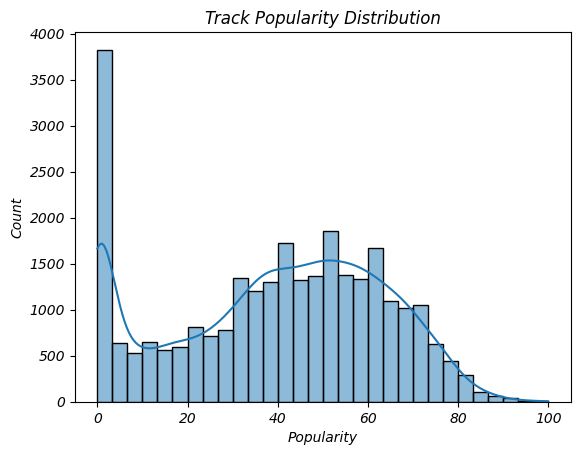

In [18]:
# Popülarite dağılımı histogramla görselleştirildi.
sns.histplot(data['popularity'], bins=30, kde=True)
plt.title("Track Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

Genre number: 6


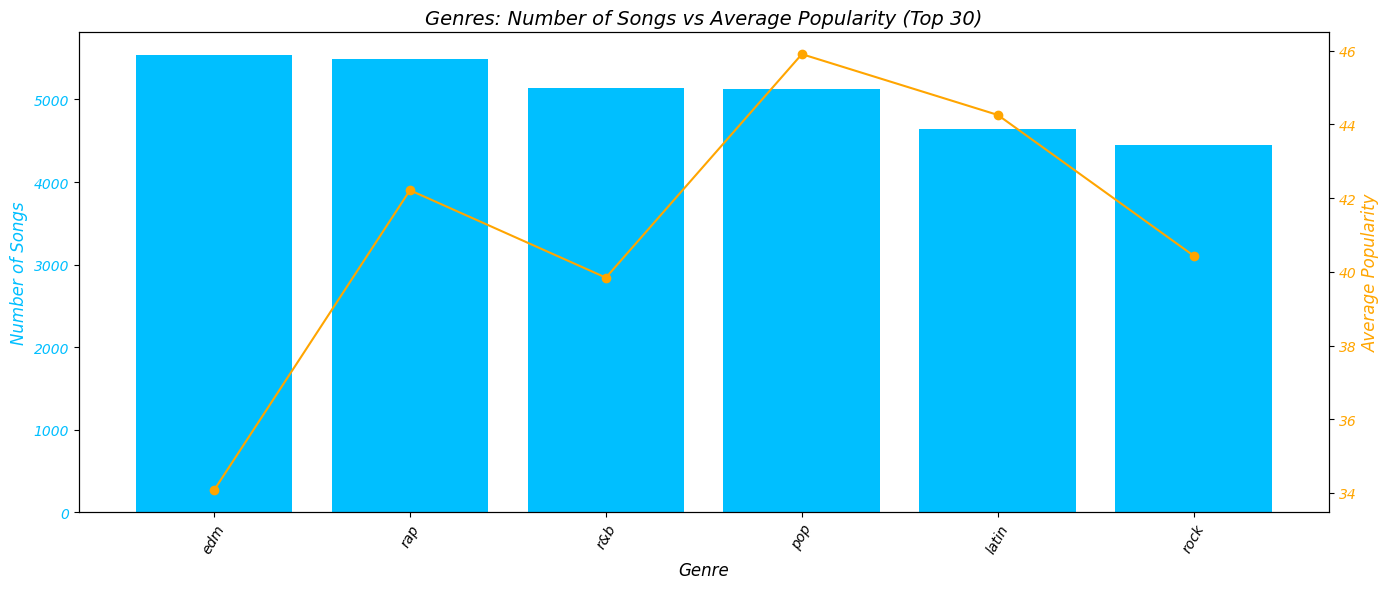

In [19]:
# Her genre'ın şarkı sayısını ve ortalama popülerliğini hesaplamak için gerekli işlemler yapıldı.

genre_cols = [col for col in data.columns if col.startswith('genre_')]

genre_stats = []
for genre_col in genre_cols:
    genre_name = genre_col.replace('genre_', '')
    song_count = data[genre_col].sum()
    avg_popularity = data.loc[data[genre_col] == 1, 'popularity'].mean()
    genre_stats.append({'Genre': genre_name, 'Song Count': song_count, 'Average Popularity': avg_popularity})


genre_stats_df = pd.DataFrame(genre_stats).sort_values(by='Song Count', ascending=False)
print("Genre number:", len(genre_stats_df))

# --- 3️⃣ En çok şarkıya sahip 30 genre seç ---
top_genres = genre_stats_df.head(30)

# --- 4️⃣ Grafik oluştur ---
fig, ax1 = plt.subplots(figsize=(14, 6))

# Şarkı sayısı (bar)
ax1.bar(top_genres['Genre'], top_genres['Song Count'], color='deepskyblue', label='Song Count')
ax1.set_xlabel('Genre', fontsize=12)
ax1.set_ylabel('Number of Songs', color='deepskyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='deepskyblue')
ax1.tick_params(axis='x', rotation=60)

# Ortalama popülerlik (çizgi)
ax2 = ax1.twinx()
ax2.plot(top_genres['Genre'], top_genres['Average Popularity'], color='orange', marker='o', label='Avg Popularity')
ax2.set_ylabel('Average Popularity', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Başlık ve legend
plt.title('Genres: Number of Songs vs Average Popularity (Top 30)', fontsize=14)
fig.tight_layout()
plt.show()

Genre number: 24


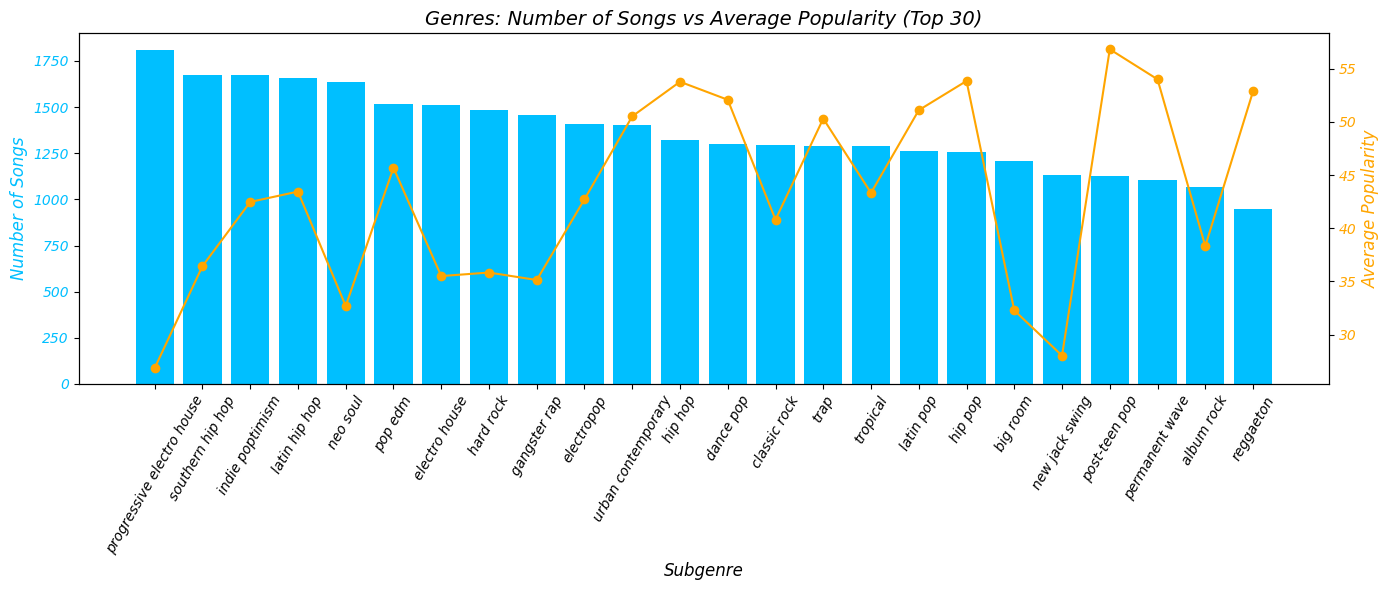

In [20]:
# Her subgenre’ın şarkı sayısını ve ortalama popülerliğini hesaplamak için gerekli işlemler yapıldı.

subgenre_cols = [col for col in data.columns if col.startswith('subgenre_')]

subgenre_stats = []
for subgenre_col in subgenre_cols:
    subgenre_name = subgenre_col.replace('subgenre_', '')
    song_count = data[subgenre_col].sum()
    avg_popularity = data.loc[data[subgenre_col] == 1, 'popularity'].mean()
    subgenre_stats.append({'Subgenre': subgenre_name, 'Song Count': song_count, 'Average Popularity': avg_popularity})


subgenre_stats_df = pd.DataFrame(subgenre_stats).sort_values(by='Song Count', ascending=False)
print("Genre number:", len(subgenre_stats_df))

# --- 3️⃣ En çok şarkıya sahip 30 subgenre seç ---
top_subgenres = subgenre_stats_df.head(30)

# --- 4️⃣ Grafik oluştur ---
fig, ax1 = plt.subplots(figsize=(14, 6))

# Şarkı sayısı (bar)
ax1.bar(top_subgenres['Subgenre'], top_subgenres['Song Count'], color='deepskyblue', label='Song Count')
ax1.set_xlabel('Subgenre', fontsize=12)
ax1.set_ylabel('Number of Songs', color='deepskyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='deepskyblue')
ax1.tick_params(axis='x', rotation=60)

# Ortalama popülerlik (çizgi)
ax2 = ax1.twinx()
ax2.plot(top_subgenres['Subgenre'], top_subgenres['Average Popularity'], color='orange', marker='o', label='Avg Popularity')
ax2.set_ylabel('Average Popularity', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Başlık ve legend
plt.title('Genres: Number of Songs vs Average Popularity (Top 30)', fontsize=14)
fig.tight_layout()
plt.show()

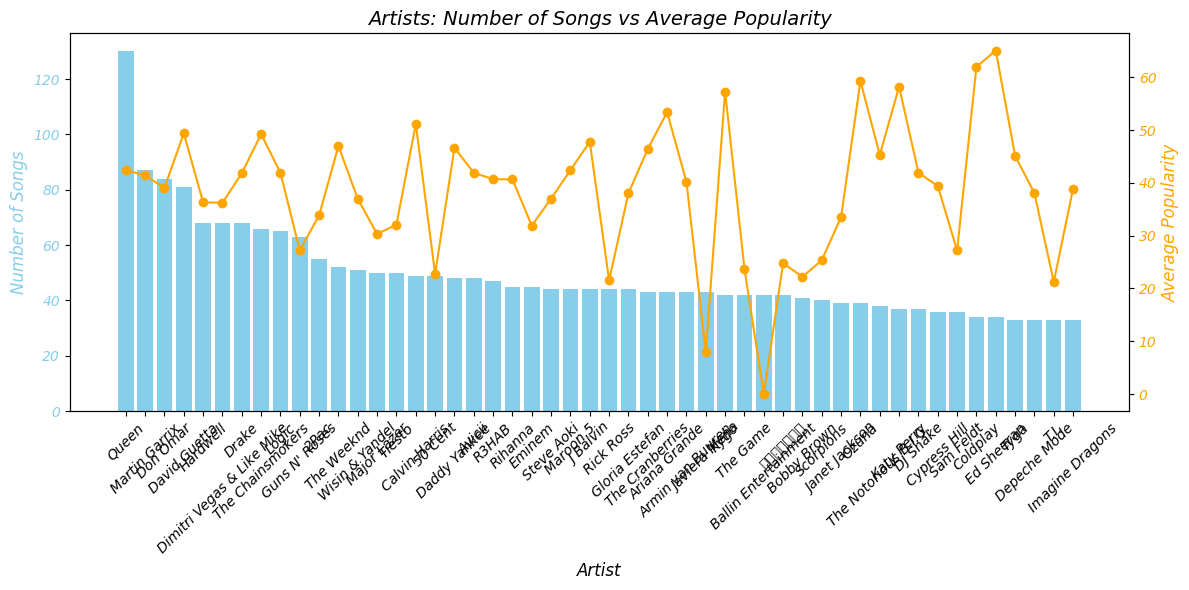

In [21]:
# Her artist'in şarkı sayısını ve ortalama popülerliğini hesaplamak için gerekli işlemler yapıldı.

artist_counts = data['artist'].value_counts() # Her bir artist için şarkı sayısı hesaplandı.
artist_popularity = data.groupby('artist')['popularity'].mean().loc[artist_counts.index] # Her bir artist için ortalama popülerlik hesaplandı.

# Veri birleştirildi.
artist_stats = pd.DataFrame({
    'Song Count': artist_counts,
    'Average Popularity': artist_popularity
})

# En popüler ilk 50 sanatçı gösterildi.
top_artists = artist_stats.head(50)

# Grafik oluşturma
fig, ax1 = plt.subplots(figsize=(12, 6))

# Şarkı sayısı için bar grafiği kullanıldı.
ax1.bar(top_artists.index, top_artists['Song Count'], color='skyblue', label='Song Count')
ax1.set_xlabel('Artist', fontsize=12)
ax1.set_ylabel('Number of Songs', color='skyblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.tick_params(axis='x', rotation=45)

# Ortalama popülerlik için çizgi grafiği kullanıldı.
ax2 = ax1.twinx()
ax2.plot(top_artists.index, top_artists['Average Popularity'], color='orange', marker='o', label='Avg Popularity')
ax2.set_ylabel('Average Popularity', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# Başlık ve legend eklendi.
plt.title('Artists: Number of Songs vs Average Popularity', fontsize=14)
fig.tight_layout()

plt.show()

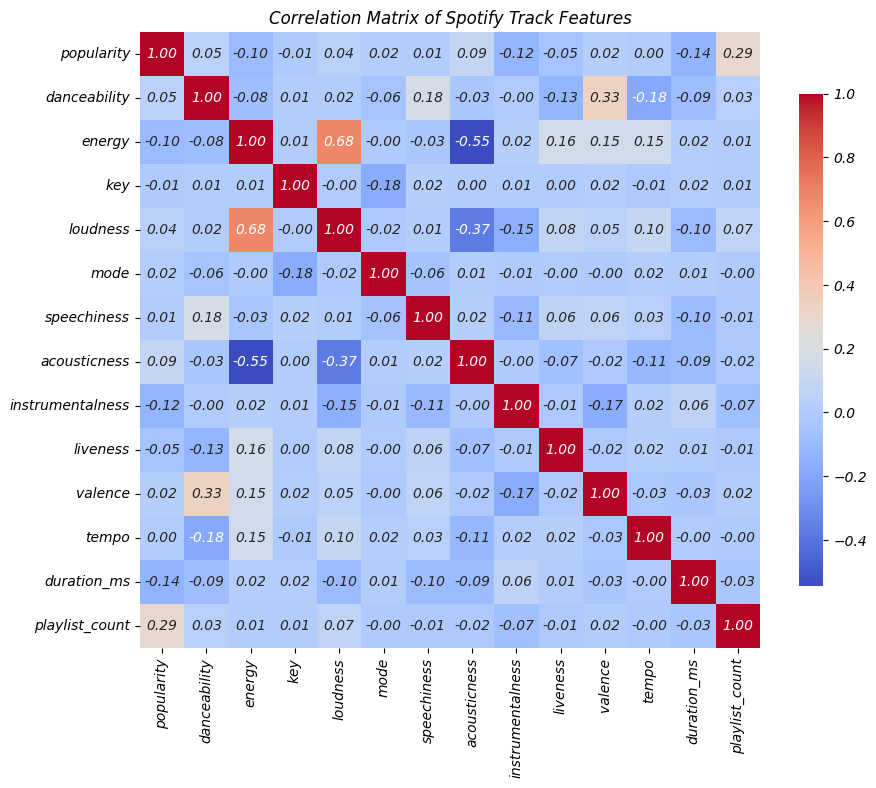

In [22]:
# Korelasyon matrisi hesaplandı ve ısı haritası ile görselleştirildi.
numeric_cols = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'playlist_count']
corr_table_data = data[numeric_cols]
corr_table = corr_table_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_table, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Spotify Track Features')
plt.show()

# Burada loudness ve energy arasında güçlü bir pozitif korelasyon olduğu gözlendi.
# Bu, daha yüksek enerjiye sahip şarkıların genellikle daha yüksek ses seviyelerine sahip olduğunu gösterir.

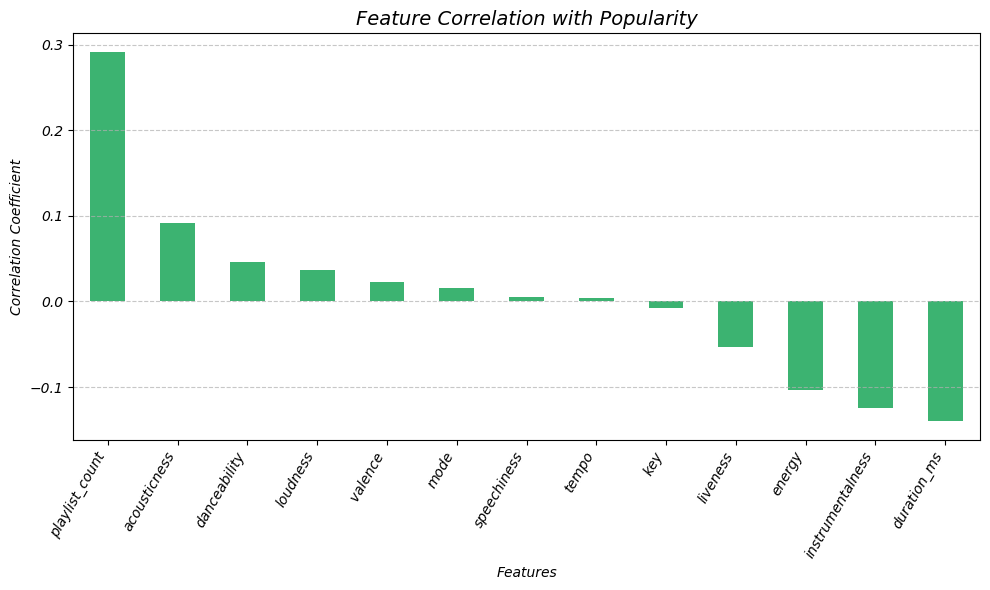

In [23]:
# Popülarite ile diğer özellikler arasındaki korelasyonlar sıralandı ve görselleştirildi.
sorted_corr = corr_table['popularity'].sort_values(ascending=False)
sorted_corr =sorted_corr.drop('popularity', errors='ignore')

# Korelasyonları görselleştirme
plt.figure(figsize=(10, 6))
sorted_corr.plot(kind='bar', color='mediumseagreen')

plt.title('Feature Correlation with Popularity', fontsize=14)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=60, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

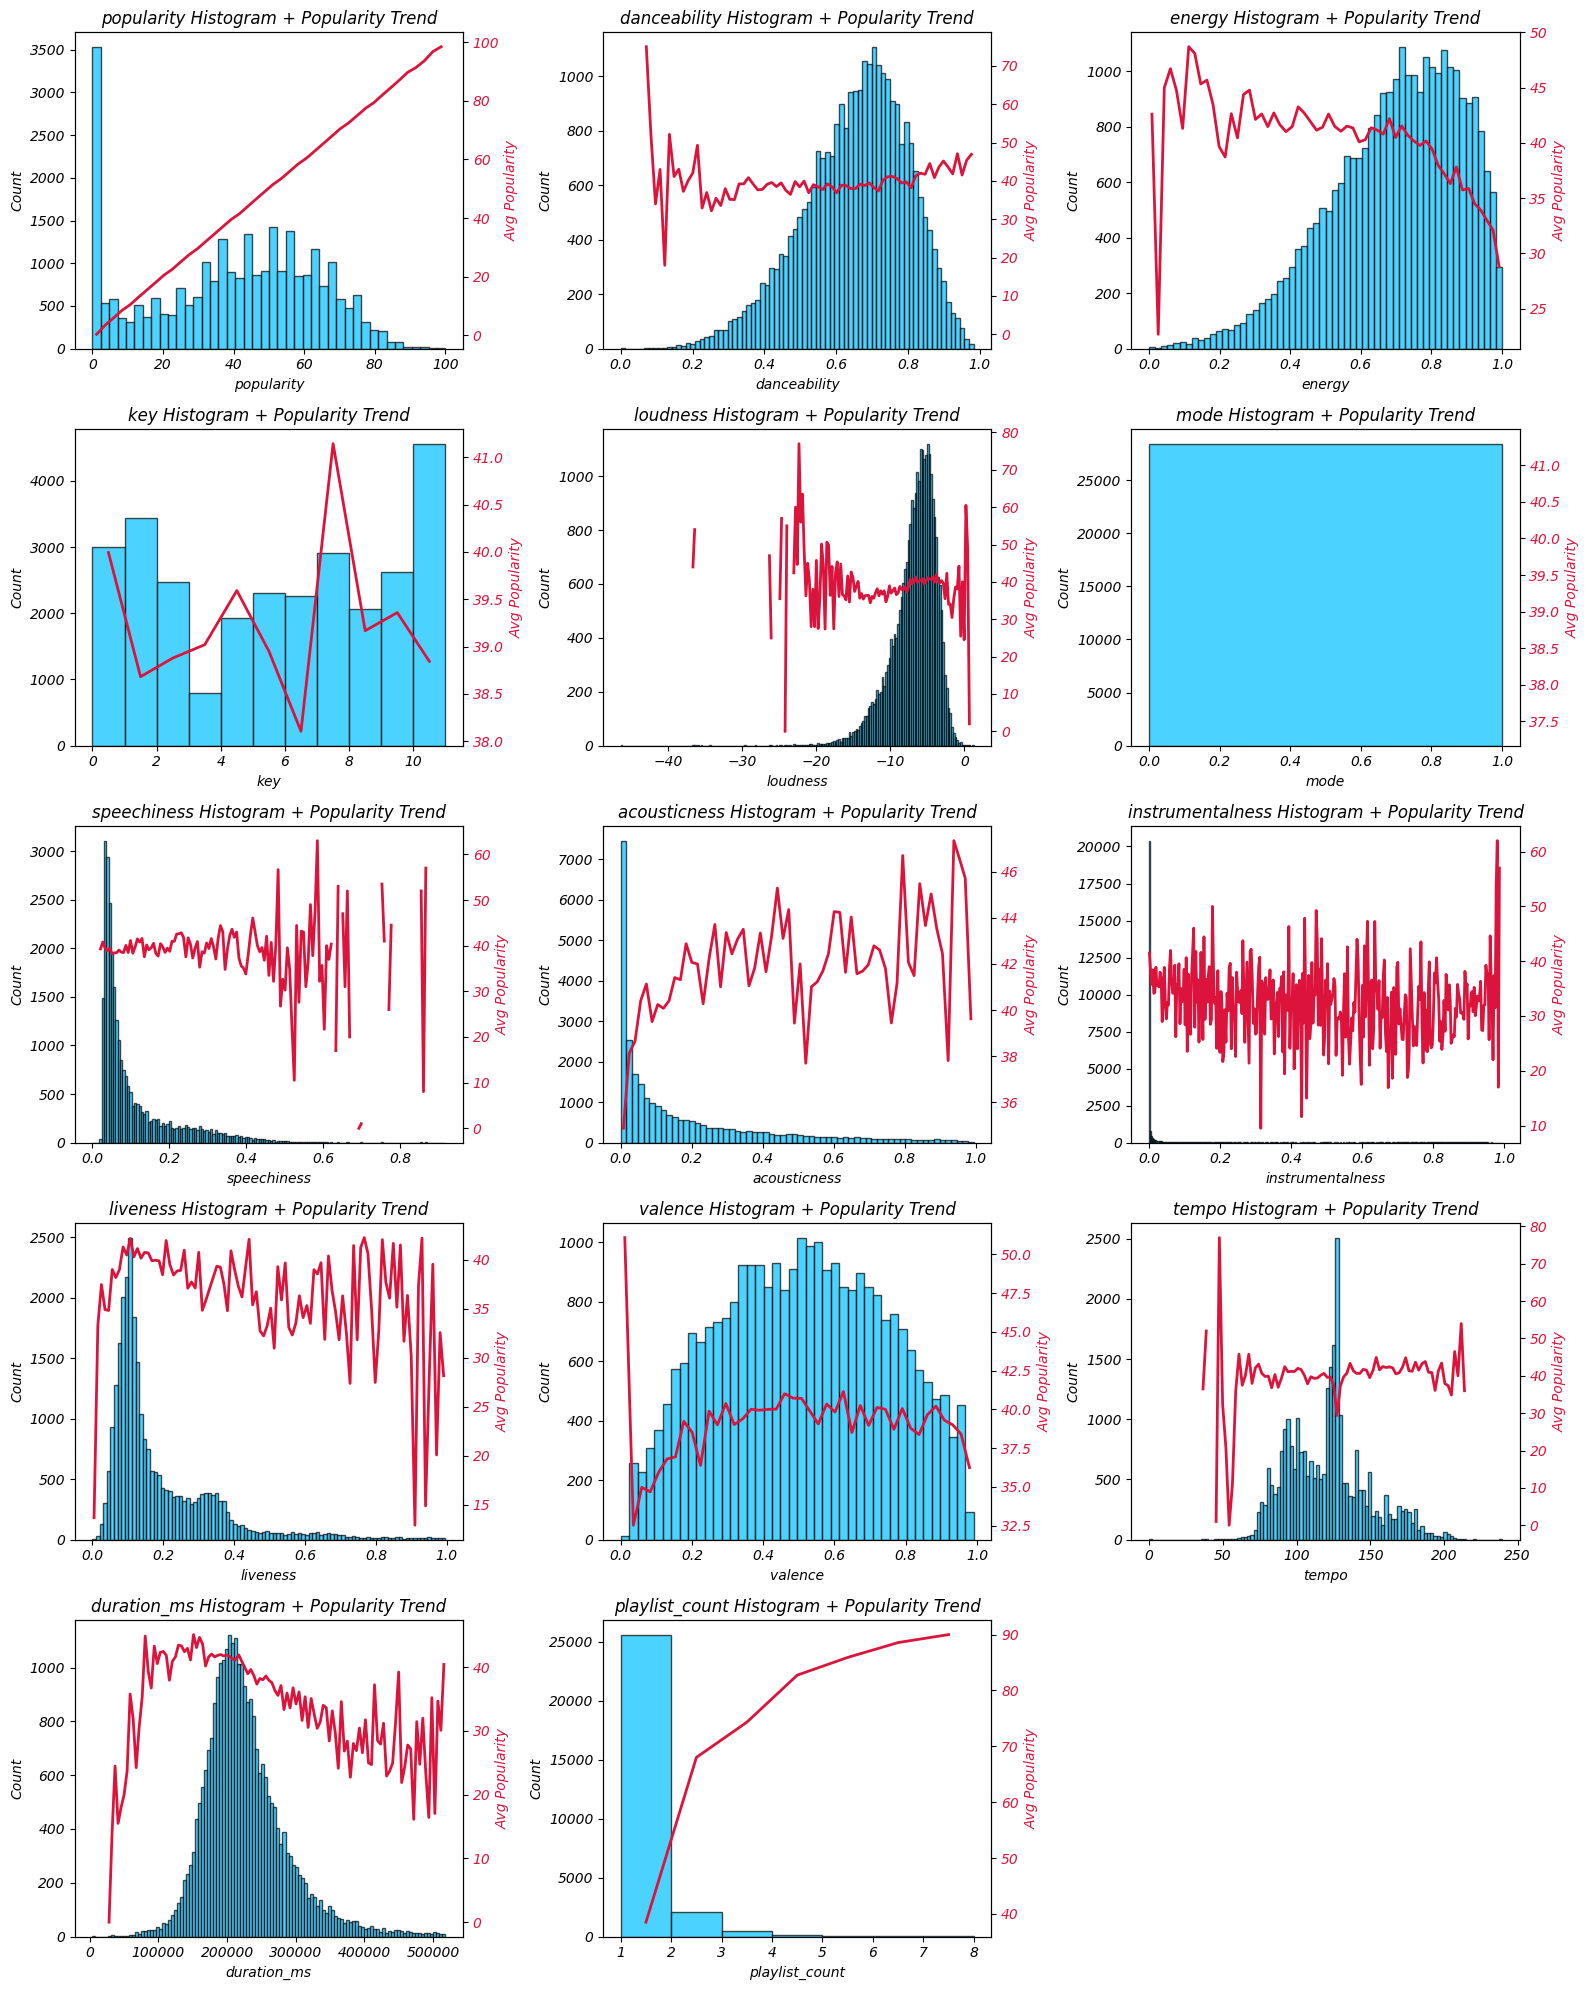

In [24]:
# Numerik sütunlar için dağılımlar ve belli aralıklar içindeki popülarite trendleri görselleştirildi.

# Satır–sütun sayısını otomatik belirle
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Histogram (önce otomatik bin aralıklarını al)
    counts, bins, patches = axes[i].hist(data[col], bins='auto', color='deepskyblue', edgecolor='black', alpha=0.7)
    
    # Popularity ortalamaları (bin aralıklarına göre): trend görüntüleme
    bin_labels = pd.cut(data[col], bins=bins, include_lowest=True)
    grouped = data.groupby(bin_labels)['popularity'].mean()
    centers = [interval.mid for interval in grouped.index]
    bin_means = grouped.values

    # Popularity çizgisi
    ax2 = axes[i].twinx()
    ax2.plot(centers, bin_means, color='crimson', linewidth=2)
    ax2.set_ylabel('Avg Popularity', color='crimson')
    ax2.tick_params(axis='y', labelcolor='crimson')

    axes[i].set_title(f'{col} Histogram + Popularity Trend')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Boş kalan hücreleri gizle
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Her bir feature için dağılımlar, min-max değerler incelendi.
# Tempo, loudness ve duration_ms özelliklerinin normalize edilmesi gerektiği gözlemlendi.

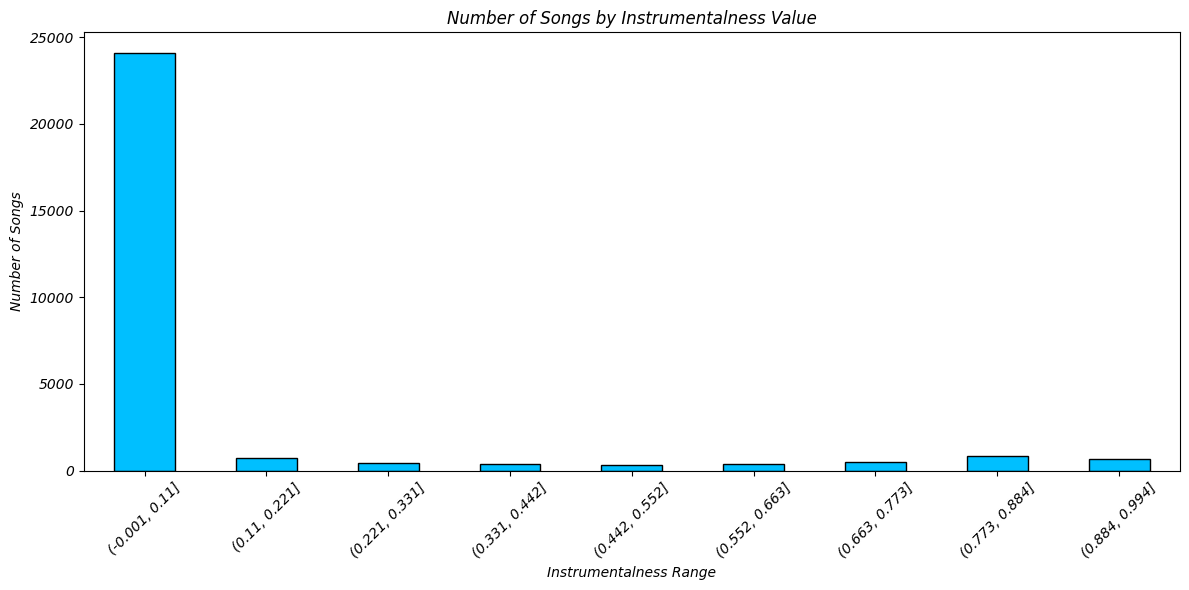

In [25]:
# Instrumentalness değerleri eşit aralıklara bölündü ve her aralıktaki şarkı sayısı görselleştirildi.

bins = np.linspace(data['instrumentalness'].min(), data['instrumentalness'].max(), 10) # Eşit aralıklı 10 bin oluşturuldu.
bin_labels = pd.cut(data['instrumentalness'], bins=bins, include_lowest=True)
counts = data.groupby(bin_labels).size()

plt.figure(figsize=(12, 6))
counts.plot(kind='bar', color='deepskyblue', edgecolor='black')
plt.xlabel('Instrumentalness Range')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Instrumentalness Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

count:  21988


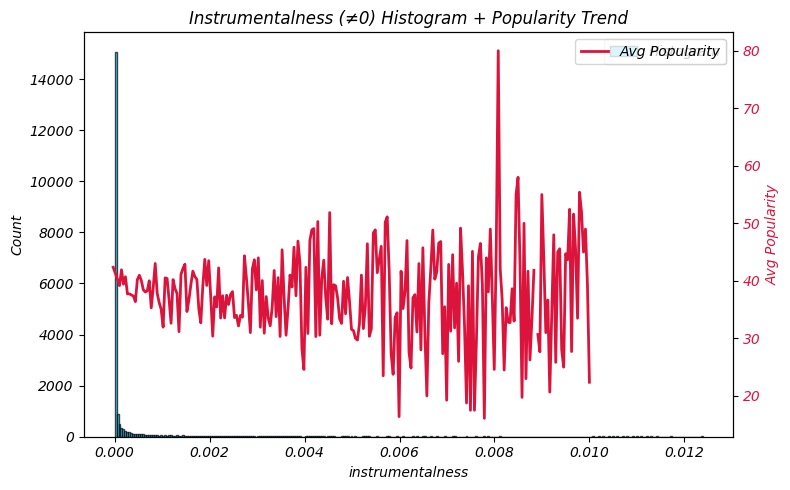

In [26]:
fig, ax = plt.subplots(figsize=(8, 5))

# Sadece 0 olmayanları al
filtered = data[data['instrumentalness']  < 0.0125]
print("count: ", len(filtered))

# Histogram (otomatik bin aralıkları)
counts, bins, patches = ax.hist(filtered['instrumentalness'], bins='auto', color='deepskyblue', edgecolor='black', alpha=0.7)

# Popularity ortalaması (bin aralıklarına göre)
bin_labels = pd.cut(filtered['instrumentalness'], bins=bins, include_lowest=True)
grouped = filtered.groupby(bin_labels)['popularity'].mean()
centers = [interval.mid for interval in grouped.index]
bin_means = grouped.values

# Popularity çizgisi
ax2 = ax.twinx()
ax2.plot(centers, bin_means, color='crimson', linewidth=2, label='Avg Popularity')
ax2.set_ylabel('Avg Popularity', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

ax.set_title('Instrumentalness (≠0) Histogram + Popularity Trend')
ax.set_xlabel('instrumentalness')
ax.set_ylabel('Count')
ax.legend(['Histogram'])
ax2.legend(['Avg Popularity'])

plt.tight_layout()
plt.show()

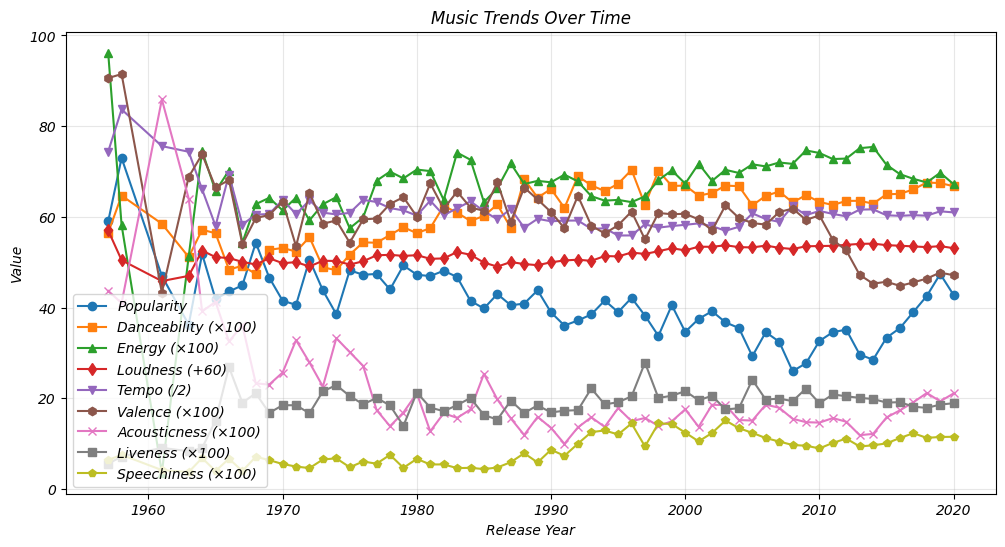

In [27]:
# Yıl bilgisine göre şarkıların özellik değişimleri analiz edildi.

# Albüm çıkış tarihinden yıl bilgisi çıkarılıp "release_year" sütunu oluşturuldu.
data['release_year'] = pd.to_datetime(data['album_release_date'], errors='coerce').dt.year

# Her yıl için ortalama popülarite ve diğer özelliklerin trendleri analiz edildi.
yearly_stats = data.groupby('release_year').agg({
    'popularity': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'tempo': 'mean',
    'acousticness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'speechiness': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_stats['release_year'], yearly_stats['popularity'], marker='o', label='Popularity')
plt.plot(yearly_stats['release_year'], yearly_stats['danceability']*100, marker='s', label='Danceability (×100)')
plt.plot(yearly_stats['release_year'], yearly_stats['energy']*100, marker='^', label='Energy (×100)')
plt.plot(yearly_stats['release_year'], yearly_stats['loudness']+60, marker='d', label='Loudness (+60)')
plt.plot(yearly_stats['release_year'], yearly_stats['tempo']/2, marker='v', label='Tempo (/2)')
plt.plot(yearly_stats['release_year'], yearly_stats['valence']*100, marker='h', label='Valence (×100)')
plt.plot(yearly_stats['release_year'], yearly_stats['acousticness']*100, marker='x', label='Acousticness (×100)')
plt.plot(yearly_stats['release_year'], yearly_stats['liveness']*100, marker='s', label='Liveness (×100)')   
plt.plot(yearly_stats['release_year'], yearly_stats['speechiness']*100, marker='p', label='Speechiness (×100)')
plt.xlabel('Release Year')
plt.ylabel('Value')
plt.title('Music Trends Over Time')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

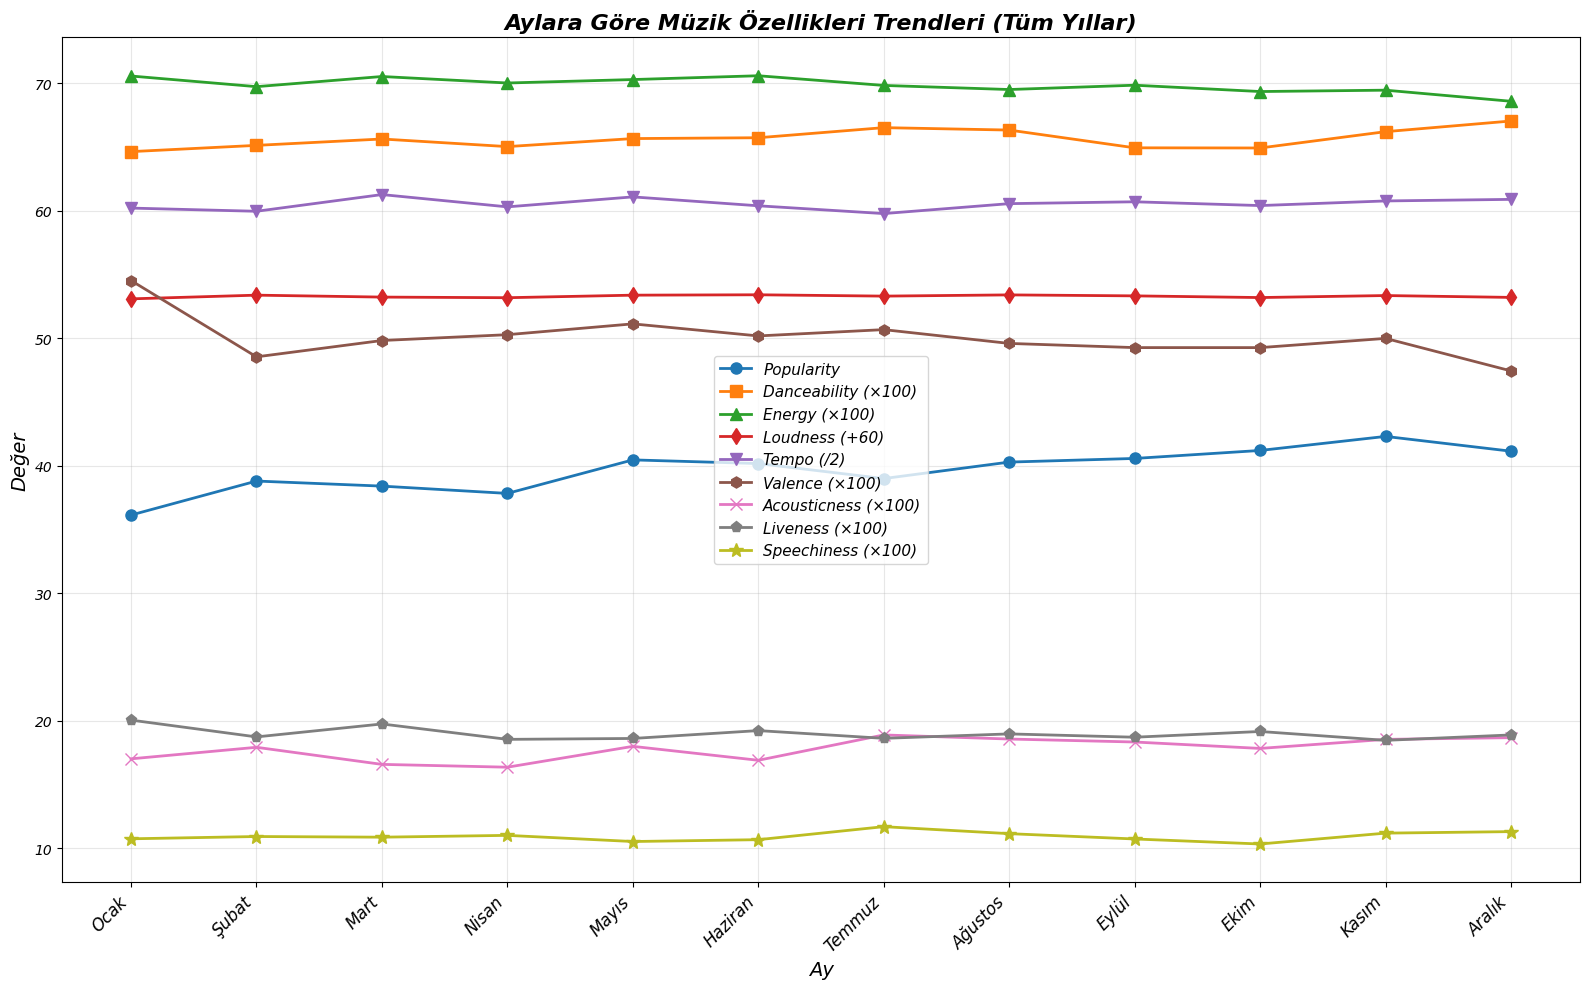


Aylara Göre Müzik Özellikleri:
month_name  popularity  danceability   energy  loudness      tempo  acousticness  liveness  valence  speechiness
      Ocak   36.132277      0.646222 0.705499 -6.919588 120.392630      0.170217  0.200580 0.545160     0.107525
     Şubat   38.797671      0.651130 0.697156 -6.629368 119.892715      0.179260  0.187402 0.485343     0.109313
      Mart   38.400785      0.656126 0.705109 -6.781322 122.511798      0.165870  0.197549 0.498149     0.108797
     Nisan   37.828796      0.650163 0.700017 -6.829629 120.584717      0.163657  0.185480 0.502718     0.110217
     Mayıs   40.456568      0.656453 0.702721 -6.630445 122.148055      0.179993  0.186184 0.511197     0.105390
   Haziran   40.169208      0.657111 0.705707 -6.600400 120.752818      0.169075  0.192346 0.501744     0.106837
    Temmuz   38.991841      0.665026 0.698119 -6.704756 119.531105      0.188943  0.186276 0.506680     0.117038
   Ağustos   40.284343      0.663128 0.694905 -6.608857 121.0880

In [28]:
# Ay bilgisine göre şarkıların özellik değişimleri analiz edildi.

# Albüm çıkış tarihinden ay bilgisi çıkarılıp "release_month" sütunu oluşturuldu.
data['release_date'] = pd.to_datetime(data['album_release_date'], errors='coerce')
data['release_month'] = data['release_date'].dt.month

# Ay isimleri sözlüğü tanımlandı.
month_names = {
    1: 'Ocak', 2: 'Şubat', 3: 'Mart', 4: 'Nisan', 
    5: 'Mayıs', 6: 'Haziran', 7: 'Temmuz', 8: 'Ağustos',
    9: 'Eylül', 10: 'Ekim', 11: 'Kasım', 12: 'Aralık'
}

# Her ay için ortalama popülarite ve diğer özelliklerin trendleri analiz edildi.
monthly_stats = data.groupby('release_month').agg({
    'popularity': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'tempo': 'mean',
    'acousticness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'speechiness': 'mean'
}).reset_index()

# Ay isimlerini ekleme
monthly_stats['month_name'] = monthly_stats['release_month'].map(month_names)

# Görselleştirme
plt.figure(figsize=(16, 10))

plt.plot(monthly_stats['month_name'], monthly_stats['popularity'], marker='o', linewidth=2, markersize=8, label='Popularity')
plt.plot(monthly_stats['month_name'], monthly_stats['danceability']*100, marker='s', linewidth=2, markersize=8, label='Danceability (×100)')
plt.plot(monthly_stats['month_name'], monthly_stats['energy']*100, marker='^', linewidth=2, markersize=8, label='Energy (×100)')
plt.plot(monthly_stats['month_name'], monthly_stats['loudness']+60, marker='d', linewidth=2, markersize=8, label='Loudness (+60)')
plt.plot(monthly_stats['month_name'], monthly_stats['tempo']/2, marker='v', linewidth=2, markersize=8, label='Tempo (/2)')
plt.plot(monthly_stats['month_name'], monthly_stats['valence']*100, marker='h', linewidth=2, markersize=8, label='Valence (×100)')
plt.plot(monthly_stats['month_name'], monthly_stats['acousticness']*100, marker='x', linewidth=2, markersize=8, label='Acousticness (×100)')
plt.plot(monthly_stats['month_name'], monthly_stats['liveness']*100, marker='p', linewidth=2, markersize=8, label='Liveness (×100)')   
plt.plot(monthly_stats['month_name'], monthly_stats['speechiness']*100, marker='*', linewidth=2, markersize=10, label='Speechiness (×100)')

plt.xlabel('Ay', fontsize=14)
plt.ylabel('Değer', fontsize=14)
plt.title('Aylara Göre Müzik Özellikleri Trendleri (Tüm Yıllar)', fontsize=16, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(alpha=0.3)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# Aylık istatistikleri tablo olarak göster
print("\nAylara Göre Müzik Özellikleri:")
print(monthly_stats[['month_name', 'popularity', 'danceability', 'energy', 'loudness', 
                     'tempo', 'acousticness', 'liveness', 'valence', 'speechiness']].to_string(index=False))

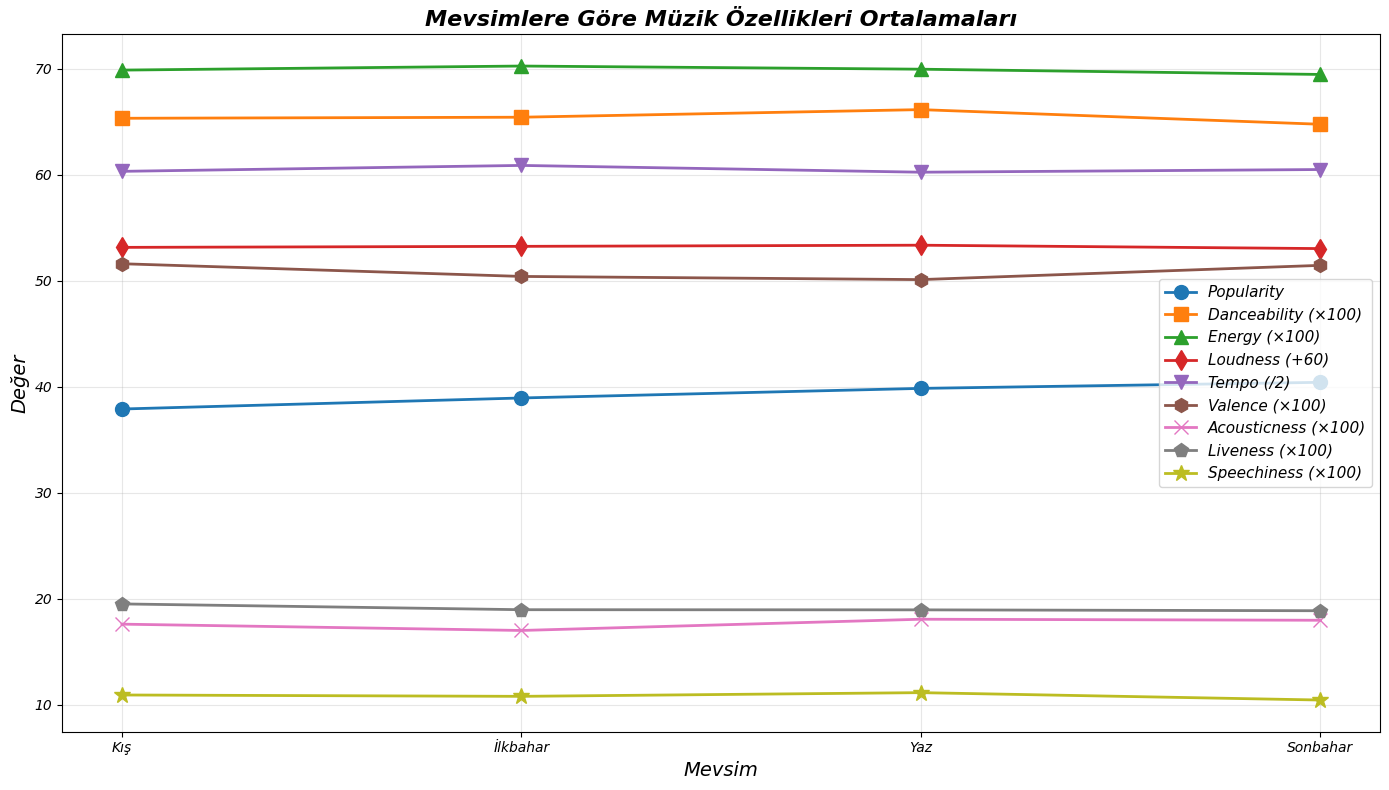


Mevsimlere Göre Müzik Özellikleri:
  season  popularity  danceability   energy  loudness      tempo  acousticness  liveness  valence  speechiness
     Kış   37.910692      0.653390 0.698842 -6.839484 120.665895      0.176148  0.195240 0.516171     0.109316
İlkbahar   38.952113      0.654391 0.702682 -6.742824 121.784622      0.170190  0.189773 0.504194     0.108030
     Yaz   39.856345      0.661561 0.699701 -6.634580 120.502738      0.180784  0.189633 0.501192     0.111523
Sonbahar   40.428571      0.647761 0.694751 -6.953982 121.009011      0.179816  0.188805 0.514629     0.104566


In [29]:
# Mevsim bilgisine göre şarkıların özellik değişimi analiz edildi.

# Tarih bilgisinden ay bilgisi çıkarıldı.
data['release_date'] = pd.to_datetime(data['album_release_date'], errors='coerce')
data['release_month'] = data['release_date'].dt.month

# Mevsim tanımlama fonksiyonu
def get_season(month):
    if month in [12, 1, 2]:
        return 'Kış'
    elif month in [3, 4, 5]:
        return 'İlkbahar'
    elif month in [6, 7, 8]:
        return 'Yaz'
    else:  # 9, 10, 11
        return 'Sonbahar'

# Her şarkıya mevsim bilgisi eklendi.
data['season'] = data['release_month'].apply(get_season)

# Her mevsim için ortalama popülarite ve diğer özelliklerin trendleri analiz edildi.
seasonal_stats = data.groupby('season').agg({
    'popularity': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'loudness': 'mean',
    'tempo': 'mean',
    'acousticness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'speechiness': 'mean'
}).reset_index()

# Mevsimleri doğru sırayla düzenle
season_order = ['Kış', 'İlkbahar', 'Yaz', 'Sonbahar']
seasonal_stats['season'] = pd.Categorical(seasonal_stats['season'], categories=season_order, ordered=True)
seasonal_stats = seasonal_stats.sort_values('season')

# Görselleştirme
plt.figure(figsize=(14, 8))

plt.plot(seasonal_stats['season'], seasonal_stats['popularity'], marker='o', linewidth=2, markersize=10, label='Popularity')
plt.plot(seasonal_stats['season'], seasonal_stats['danceability']*100, marker='s', linewidth=2, markersize=10, label='Danceability (×100)')
plt.plot(seasonal_stats['season'], seasonal_stats['energy']*100, marker='^', linewidth=2, markersize=10, label='Energy (×100)')
plt.plot(seasonal_stats['season'], seasonal_stats['loudness']+60, marker='d', linewidth=2, markersize=10, label='Loudness (+60)')
plt.plot(seasonal_stats['season'], seasonal_stats['tempo']/2, marker='v', linewidth=2, markersize=10, label='Tempo (/2)')
plt.plot(seasonal_stats['season'], seasonal_stats['valence']*100, marker='h', linewidth=2, markersize=10, label='Valence (×100)')
plt.plot(seasonal_stats['season'], seasonal_stats['acousticness']*100, marker='x', linewidth=2, markersize=10, label='Acousticness (×100)')
plt.plot(seasonal_stats['season'], seasonal_stats['liveness']*100, marker='p', linewidth=2, markersize=10, label='Liveness (×100)')
plt.plot(seasonal_stats['season'], seasonal_stats['speechiness']*100, marker='*', linewidth=2, markersize=12, label='Speechiness (×100)')

plt.xlabel('Mevsim', fontsize=14)
plt.ylabel('Değer', fontsize=14)
plt.title('Mevsimlere Göre Müzik Özellikleri Ortalamaları', fontsize=16, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Mevsimsel istatistikleri tablo olarak göster
print("\nMevsimlere Göre Müzik Özellikleri:")
print(seasonal_stats[['season', 'popularity', 'danceability', 'energy', 'loudness', 
                      'tempo', 'acousticness', 'liveness', 'valence', 'speechiness']].to_string(index=False))
